In [20]:
import pandas as pd
from ds_util.redshift import run_redshift, create_and_load_table

import numpy as np

In [7]:
sql = '''
 SELECT
       zip
       , metro_code
       , state
       , activity_date
       , campaign_id
       , SUM(impressions) AS impressions
       , SUM(engagements) AS engagements
       , SUM(redemptions) AS redemptions
       , SUM(budget_used) AS budget_used
FROM ((
       SELECT
               cs.zip AS zip
               , zips.metro_code AS metro_code
               , cs.state AS state
               , TRUNC(tro.event_at) AS activity_date
               , cm.id AS campaign_id
               , COUNT (customer_id) AS impressions
               , 0 AS engagements
               , 0 AS redemptions
               , 0 AS budget_used
       FROM tracking_offer tro
       LEFT JOIN offers o ON tro.offer_id = o.id
       LEFT JOIN campaigns cm ON o.campaign_id = cm.id
       LEFT JOIN customers cs ON tro.customer_id = cs.id
       LEFT JOIN zips ON cs.zip = zips.zip
       WHERE
               CONVERT_TIMEZONE('UTC', 'America/Denver', tro.event_at) >= getdate()-730
               AND cm.id = 11891
               AND cs.zip in (80132, 80020, 80205, 80126, 01960, 07082)
       GROUP BY 1, 2, 3, 4, 5, 7, 8, 9)
UNION (
       SELECT
               cs.zip AS zip
               , zips.metro_code AS metro_code
               , cs.state AS state
               , TRUNC(fcog.created_at) AS activity_date
               , cm.id AS campaign_id
               , 0 AS impressions
               , COUNT (fcog.offer_id) AS engagements
               , 0 AS redemptions
               , 0 AS budget_used
       FROM fact_completed_offer_engagements fcog
       LEFT JOIN offers o ON fcog.offer_id = o.id
       LEFT JOIN campaigns cm ON o.campaign_id = cm.id
       LEFT JOIN customers cs ON fcog.customer_id = cs.id
       LEFT JOIN zips ON cs.zip = zips.zip
       WHERE
               CONVERT_TIMEZONE('UTC', 'America/Denver', fcog.created_at) >= getdate()-730
               AND cm.id = 11891
               AND cs.zip in (80132, 80020, 80205, 80126, 01960, 07082)
       GROUP BY 1, 2, 3, 4, 5, 6, 8, 9)
UNION (
       SELECT
               cs.zip
               , zips.metro_code
               , cs.state
               , TRUNC(frivo.verified) AS activity_date
               , cm.id AS campaign_id
               , 0 AS impressions
               , 0 AS engagements
               , SUM (frivo.alloc_redemp) AS redemptions
               , 0 AS budget_used
       FROM fact_receipt_item_verified_offers frivo
       LEFT JOIN offers o ON frivo.offer_id = o.id
       LEFT JOIN campaigns cm on o.campaign_id = cm.id
       LEFT JOIN customers cs on frivo.customer_id = cs.id
       LEFT JOIN zips ON cs.zip = zips.zip
       WHERE
               CONVERT_TIMEZONE('UTC', 'America/Denver', frivo.verified) >= getdate()-730
               AND cm.id = 11891
               AND cs.zip in (80132, 80020, 80205, 80126, 01960, 07082)
       GROUP BY 1, 2, 3, 4, 5, 6, 7, 9)
UNION (
       SELECT
               cs.zip
               , zips.metro_code
               , cs.state
               , TRUNC(fcbp.activity_at) AS activity_date
               , cm.id AS campaign_id
               , 0 AS impressions
               , 0 AS engagements
               , 0 AS redemptions
               , SUM (fcbp.value) AS budget_used
       FROM fact_customer_budget_pdt fcbp
       LEFT JOIN campaigns cm on fcbp.campaign_id = cm.id
       LEFT JOIN customers cs on fcbp.customer_id = cs.id
       LEFT JOIN zips ON cs.zip = zips.zip
       WHERE
               CONVERT_TIMEZONE('UTC', 'America/Denver', fcbp.activity_at) >= getdate()-730
               AND cm.id = 11891
               AND cs.zip in (80132, 80020, 80205, 80126, 01960, 07082)
       GROUP BY 1, 2, 3, 4, 5, 6, 7, 8))
GROUP BY 1, 2, 3, 4, 5
'''

In [8]:
df = run_redshift(sql, return_data=True)

In [10]:
df.head()

,zip,metro_code,state,activity_date,campaign_id,impressions,engagements,redemptions,budget_used
0,80020,751,CO,2017-02-05,11891,5,0,0.0,0.0
1,80020,751,CO,2017-02-07,11891,7,0,0.0,0.0
2,80126,751,CO,2017-02-03,11891,1,0,0.0,0.0
3,80126,751,CO,2017-02-07,11891,1,0,0.0,0.0
4,80132,752,CO,2017-02-08,11891,2,0,0.0,0.0


In [14]:
df.groupby('zip').impressions.sum()

zip
80020    86
80126    21
80132    37
80205    10
Name: impressions, dtype: int64

In [15]:
df.shape

(33, 9)

In [16]:
df2 = pd.DataFrame([9,0,2])

In [17]:
df2.head()

,0
0,9
1,0
2,2


In [18]:
example = df.join(df2, how='inner')

In [19]:
example.head()

,zip,metro_code,state,activity_date,campaign_id,impressions,engagements,redemptions,budget_used,0
0,80020,751,CO,2017-02-05,11891,5,0,0.0,0.0,9
1,80020,751,CO,2017-02-07,11891,7,0,0.0,0.0,0
2,80126,751,CO,2017-02-03,11891,1,0,0.0,0.0,2


In [21]:
np.mean(df2)

0    3.666667
dtype: float64

In [22]:
df2.mean()

0    3.666667
dtype: float64

In [24]:
import chess

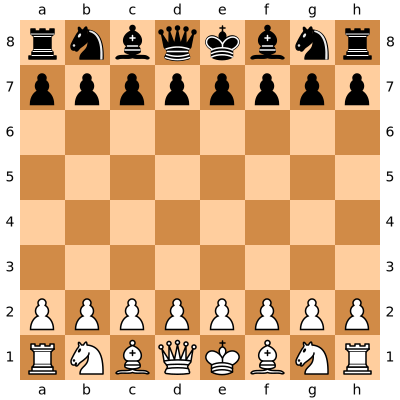

In [25]:
chess.Board()

In [27]:
import pdb 